#### 等权分配改为可赋值的权值

In [1]:
import numpy as np
import pandas as pd

In [2]:
class Para:
    path_data = 'weekly.xlsx'
    range_data = range(3,25)
    hold_time = range(3,25)
    percent = 0.2
para = Para()

In [3]:
number = 29
new_columns = range(number)
data_processed = pd.read_excel(para.path_data, 'Sheet1', index_col=None, na_values=['NA'],names = new_columns, header=0) #待处理数据
data_processed = data_processed.dropna(axis=0)

In [4]:
key_names = data_processed.iloc[0:2,1:]
result = key_names.T
key_names = result.to_dict()

In [5]:
def function(range_data,hold_time,percent):
    value_df = np.zeros([len(range_data),len(hold_time)])
    value_df = pd.DataFrame(data = value_df, index = range_data, columns = hold_time)
    value_df.index.name = '样本时间'
    value_df.columns.name = '持股时间'
    numbers = data_processed.shape[1]-1
    numbers = int(numbers*percent)
    mainNp = np.zeros(numbers)
    mainDf = pd.DataFrame(mainNp).T
    for index in range_data:

        for columns in hold_time:

            #循环次数
            count = int((data_processed.shape[0]-2)/(index+columns))
            numbers = data_processed.shape[1]-1
            numbers = int(numbers*percent)
            nameNp = np.zeros([count,numbers])
            
            for i in range(count):
                section = int(2+(index+columns)*i)
                
                #均值
                mean_data = np.mean(data_processed.iloc[section:section+index,1:])
                mean_data = mean_data.sort_values(ascending = False)
                selected_data = mean_data.iloc[:numbers]
                selected_names = selected_data.index
                
                names = selected_names.to_numpy() 
                nameNp[i] = names
                
                selected_data = data_processed[data_processed.index[names-1]]
                selected_data = np.mean(selected_data.iloc[section+index:section+index+columns,:])
                selected_data = np.mean(selected_data.T)
                value_df[columns][index] = selected_data
                
            nameDf = pd.DataFrame(nameNp)
            nameDf = nameDf.astype(int)
            if columns == hold_time[0]:
                mainDf = nameDf
            else:
                mainDf = mainDf.append(nameDf)
            mainDf.index.name = '择股次数(x+1)'
            mainDf.columns.name = '择股名称（涨幅降序）'
    return value_df,mainDf

a = function(para.range_data,para.hold_time,para.percent)

#### 创建一个column = mean_data.shape[0]* percent ，index = count的全零

In [6]:
#行业名称
industry_names = a[1].replace(key_names[1])
#行业序号
industry_codes = a[1].replace(key_names[2])

In [7]:
industry_names

择股名称（涨幅降序）,0,1,2,3,4
择股次数(x+1),,,,,
0,建筑材料(申万),钢铁(申万),家用电器(申万),房地产(申万),公用事业(申万)
1,传媒(申万),食品饮料(申万),休闲服务(申万),计算机(申万),医药生物(申万)
2,房地产(申万),非银金融(申万),家用电器(申万),有色金属(申万),食品饮料(申万)
3,银行(申万),建筑装饰(申万),房地产(申万),建筑材料(申万),家用电器(申万)
4,传媒(申万),计算机(申万),电子(申万),医药生物(申万),通信(申万)
...,...,...,...,...,...
5,房地产(申万),休闲服务(申万),综合(申万),纺织服装(申万),汽车(申万)
6,建筑装饰(申万),建筑材料(申万),钢铁(申万),商业贸易(申万),综合(申万)
7,钢铁(申万),有色金属(申万),食品饮料(申万),非银金融(申万),电子(申万)


#### 列出每次选择的行业指数名称

In [8]:
#画图
import matplotlib.pyplot as plt

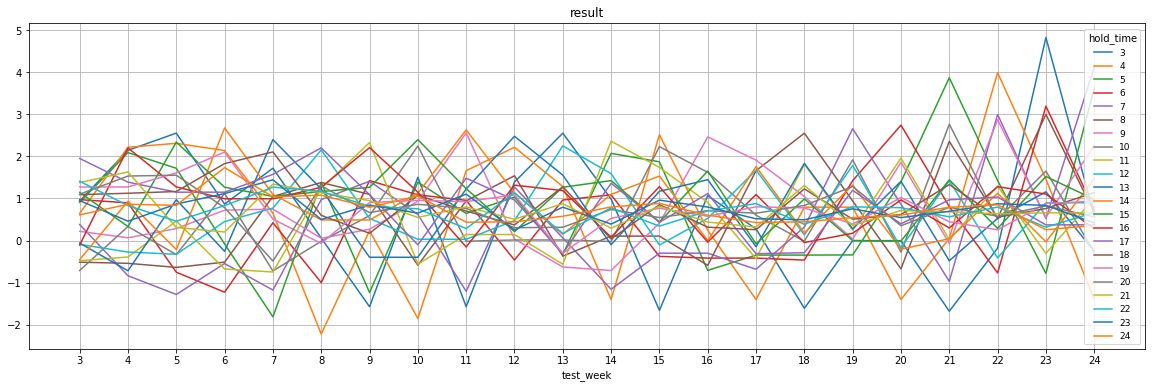

In [22]:
result = a[0]
result.index.name = 'test_week'
result.columns.name = 'hold_week'
plot = result.plot(title = 'result',figsize = (20,6),grid = True,xticks = para.range_data,legend = True)
plot.legend(loc='lower right', fontsize= 9,title ='hold_time') #修改label

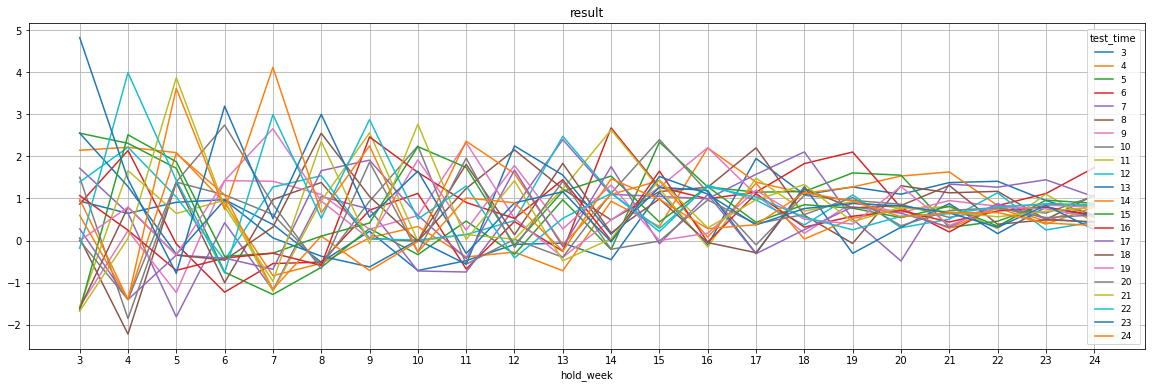

In [21]:
result = a[0].T
plot = result.plot(title = 'result',figsize = (20,6),grid = True,xticks = para.range_data,legend = True)
plot.legend(loc='lower right', fontsize= 9,title ='test_time') #修改label